In [77]:
from pynq import PL
from pynq import Overlay
from pynq import allocate

import numpy as np
import matplotlib.pyplot as plt

In [78]:
PL.reset()
xadc_stream = Overlay('dpp_counter_2.bit')

dma   = xadc_stream.axi_dma_0
xgpio = xadc_stream.axi_gpio_0

In [99]:
xgpio.read(8)

91

In [80]:
xgpio.write(0,15)

In [83]:
input_buffer = allocate(shape=(1023,), dtype=np.uint32)

In [100]:
dma.recvchannel.transfer(input_buffer)
input_buffer1 = input_buffer
for i in range(len(input_buffer1)):
    if input_buffer1[i]>0.5:
        input_buffer1[i] = input_buffer1[i]-1

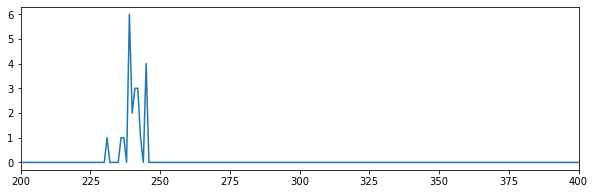

In [94]:
plt.figure(figsize=(10,3))
plt.plot(range(0, 1023), input_buffer1)
plt.xlim(200, 400)
plt.show()

In [101]:
print(np.sum(input_buffer))

72
